In [5]:
from networks import SentimentAnalysis
import re
from matplotlib import pyplot as plt
from tqdm import tqdm, trange
import numpy as np
SA = SentimentAnalysis()

# 评分函数
def predict(sent):
    """
    1: positif
    0: neutral
    -1: negatif
    """
    score1, score0 = SA.normalization_score(sent)
    if score1 == score0:
        result = 0
    elif score1 > score0:
        result = 1
    elif score1 < score0:
        result = -1
    return score1 - score0 #result

# 版本为python3，如果为python2需要在字符串前面加上u


# 分句函数
def cut_sent(para):
    para = re.sub('([。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([。！？\?][”’])([^，。！？\?])', r'\1\n\2', para)
    # 如果双引号前有终止符，那么双引号才是句子的终点，把分句符\n放到双引号后，注意前面的几句都小心保留了双引号
    para = para.rstrip()  # 段尾如果有多余的\n就去掉它
    # 很多规则中会考虑分号;，但是这里我把它忽略不计，破折号、英文双引号等同样忽略，需要的再做些简单调整即可。
    return para.split("\n")

def get_sentiment_score(filename):
    """
    获取全文情感分数
    """
    s = []
    # 把此处的文件位置改成要分析的文件位置
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()
        text = cut_sent(text)
        text = list(filter(None, text))
        for w in text:
            s.append(predict(w))
    return s, len(s)

def getarc(file_name, folder='',outdir='../output'):
    file_path = folder+file_name
    from scipy.signal import savgol_filter
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    try:
        s,slen=get_sentiment_score(file_path)
    except:
        print("file_path error",file_path)
    

    window_length =201 # min(slen//15*2+1,2001)
    writer=open(outdir+'/'+file_name,'a+',encoding='utf-8')
    writer.write('-'*30+'\n')
    writer.write(file_name +" 共%d个句子\n"%slen)
    writer.write("%.2f\n"%(np.mean(s)*100))

    plt.figure(figsize=(40,20))
    data_x= np.linspace(1,len(s),len(s))
    kr = KernelReg(s,data_x,'c')
    s, _ = kr.fit(data_x)
    # s=savgol_filter(s,  window_length, 2)
    # s=savgol_filter(s,  window_length, 2)
    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot(s)

    plt.title( file_name,fontsize='xx-large')
    top_list=[]
    bot_list=[]
    
    for i in range(1,slen-1):
        if s[i]>s[i-1] and s[i]>s[i+1]:
            top_list.append(s[i])
            # writer.write("第%d句出现波峰：%.2f\n%s%s%s\n"%(i,s[i]*100,text[i-1],text[i],text[i+1]))
        if s[i]<s[i-1] and s[i]<s[i+1]:
            bot_list.append(s[i])
            # writer.write("第%d句出现波谷：%.2f\n%s%s%s\n"%(i,s[i]*100,text[i-1],text[i],text[i+1]))
    # writer.write(file_name +" 共%d个起伏，波谷最值%.2f,波峰最值%.2f\n"%(len(top_list),min(bot_list)*100,max(top_list)*100))
    # print(slen,len(top_list),len(bot_list),max(top_list),min(bot_list))
    plt.show()
    # plt.savefig(os.path.join(outdir, file_name.split('.')[0]) + ".png")
    plt.close()
# getarc('../晋江2003~2021文包/2003-30本/《妲己之死》蒋胜男.txt')


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache


Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\not.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\positive.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\negative.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\most.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\very.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\more.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\ish.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\insufficiently.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\over.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\inverse.txt) finished !


Loading model cost 0.607 seconds.
Prefix dict has been built successfully.


In [64]:
import os
files=[]
for dir1 in os.listdir('../晋江2003~2021文包/')[15:]:
    for dir2 in os.listdir('../晋江2003~2021文包/'+dir1):
        files.append('../晋江2003~2021文包/'+dir1+'/'+dir2)
# print(os.listdir('../晋江2003~2021文包'))
# for dir1 in os.listdir('../晋江2003~2021文包/归档0405'):
#     for dir2 in os.listdir('../晋江2003~2021文包/归档0405'+'/'+dir1):
#         files.append('../晋江2003~2021文包/归档0405'+'/'+dir1+'/'+dir2)
# print(files)
#  folder = '../晋江2003~2021文包/2003-30本'
# outdir = '../outputs/2003'
# files = [os.path.join(folder, filename) for filename in os.listdir(folder)]


['../晋江2003~2021文包/2018-50本/BE狂魔求生系统 快穿 .txt', '../晋江2003~2021文包/2018-50本/PUBG世纪网恋.txt', '../晋江2003~2021文包/2018-50本/[B.现言]不乖.txt', '../晋江2003~2021文包/2018-50本/[B.穿书]我被男主的白月光看上了❤金推.txt', '../晋江2003~2021文包/2018-50本/[快穿]大佬都爱我.txt', '../晋江2003~2021文包/2018-50本/[无限流]晏白白：惊！说好的选秀综艺竟然.txt', '../晋江2003~2021文包/2018-50本/[校园]他的小仙女.txt', '../晋江2003~2021文包/2018-50本/[校园]他那么撩.txt', '../晋江2003~2021文包/2018-50本/[校园]时光与他，恰是正好.txt', '../晋江2003~2021文包/2018-50本/[灵魂转换.校园]反转人生[互穿].txt', '../晋江2003~2021文包/2018-50本/[现言.业界精英]小温柔.txt', '../晋江2003~2021文包/2018-50本/[现言.业界精英]白色橄榄树.txt', '../晋江2003~2021文包/2018-50本/[现言.豪门世家]如果月亮不抱你.txt', '../晋江2003~2021文包/2018-50本/[现言.青梅竹马]奶油味暗恋.txt', '../晋江2003~2021文包/2018-50本/[现言]在暴雪时分.txt', '../晋江2003~2021文包/2018-50本/[现言]第二十八年春.txt', '../晋江2003~2021文包/2018-50本/[穿书.现言]我有霸总光环.txt', '../晋江2003~2021文包/2018-50本/《AWM[绝地求生]》作者：漫漫何其多.txt', '../晋江2003~2021文包/2018-50本/《不要在垃圾桶里捡男朋友[快穿]》BY骑鲸南去.txt', '../晋江2003~2021文包/2018-50本/《图灵密码》作者：非天夜翔.txt', '../晋江2003~2021文包/2018-50本/《幼崽护养协会》作者：酒矣.txt', '../晋

In [65]:
def save_npz(files):
    for filename in files:
        s, l = get_sentiment_score(filename)
        # print(filename, np.mean(s), l)
        file_path='../output0405/'+filename.split('/')[-2]
        if os.path.exists(file_path)==False:
            os.makedirs(file_path)
        np.savez(file_path+'/'+filename.split('/')[-1][:-4], s)
save_npz(files)

PermissionError: [Errno 13] Permission denied: '../晋江2003~2021文包/归档0405/2018-50本'

In [3]:

import os 
from pip._vendor import chardet
from util.langconv import Converter
def Valuable(sentence):
    
    if sentence=='':
        return False
    ignore_list=['感谢投出','感谢灌溉','非常感谢','感谢在','作者有话','www','http']
    for ignore_word in ignore_list:    
                if ignore_word in sentence:
                    return False
    return True   
def cut_sent(para):
    para = re.sub('([。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([。！？\?][”’])([^，。！？\?])', r'\1\n\2', para)
    # 如果双引号前有终止符，那么双引号才是句子的终点，把分句符\n放到双引号后，注意前面的几句都小心保留了双引号
    para = para.rstrip()  # 段尾如果有多余的\n就去掉它
    # 很多规则中会考虑分号;，但是这里我把它忽略不计，破折号、英文双引号等同样忽略，需要的再做些简单调整即可。
    return para.split("\n")
    
def readtype(path):
    types=['utf-16','utf-8','gbk','GB18030','GB2312','ISO8859-1','ISO8859-3','ISO8859-15']
    for etype in types:
        try:
            reader=open(path,'r',encoding=etype)
            code=reader.read()
            output=''
            for sentence in cut_sent(code):
                # sentence=sentence.strip()
                # sentence = Converter('zh-hans').convert(sentence)
                if Valuable(sentence):
                    output+=sentence
            return output
        except:
            continue
    print("error:",path)


In [62]:
def overload_txt(files):
    for file in files:
        file_path='../晋江2003~2021文包/'+file.split('/')[-2]
        if not os.path.exists(file_path):
            os.makedirs(file_path)
        file_name=file_path+'/'+file.split('/')[-1]
        writer=open(file_name,'w',encoding='utf-8')
        writer.write(readtype(file))
overload_txt(files)

In [ ]:
allFileNum = 0  
def printPath(level, path):  
    global allFileNum  
    ''''' 
    打印一个目录下的所有文件夹和文件 
    '''  
    # 所有文件夹，第一个字段是次目录的级别  
    dirList = []  
    # 所有文件  
    fileList = []  
    # 返回一个列表，其中包含在目录条目的名称(google翻译)  
    files = os.listdir(path)  
    # 先添加目录级别  
    dirList.append(str(level))  
    for f in files:  
        if(os.path.isdir(path + '/' + f)):  
            # 排除隐藏文件夹。因为隐藏文件夹过多  
            if(f[0] == '.'):  
                pass  
            else:  
                # 添加非隐藏文件夹  
                dirList.append(f)  
        if(os.path.isfile(path + '/' + f)):  
            # 添加文件  
            fileList.append(f)  
    # 当一个标志使用，文件夹列表第一个级别不打印  
    i_dl = 0  
    for dl in dirList:  
        if(i_dl == 0):  
            i_dl = i_dl + 1  
        else:  
            # 打印至控制台，不是第一个的目录  
            # print( '-' * (int(dirList[0])), dl)  
            # 打印目录下的所有文件夹和文件，目录级别+1  
            printPath((int(dirList[0]) + 1), path + '/' + dl)  
    for fl in fileList:  
        # 打印文件  
        dirPath='pack/'+path
        if not os.path.exists(dirPath):
            os.makedirs(dirPath)
        
        # print ('-' * (int(dirList[0])), fl ) 
        
        writer=open(dirPath+'/' + fl,'w+',encoding='utf-8')    
        writer.write(readtype(path + '/' + fl))
        writer.close()    
        
        # 随便计算一下有多少个文件  
        allFileNum = allFileNum + 1  

In [ ]:
# getarc(file_name='难哄by竹已.txt',folder='../晋江2003~2021文包/2020-50本/')
# getarc(file_name='《AWM[绝地求生]》作者：漫漫何其多.txt',folder='')

In [ ]:
def getarc_v2(s):
    from scipy.signal import savgol_filter
    
    window_length = len(s)//15*2+1

    # plt.figure(figsize=(40,20))
    s=savgol_filter(s,  window_length, 2)
    s=savgol_filter(s,  window_length, 2)
    
    top_list=[]
    bot_list=[]
    
    for i in range(1,slen-1):
        if s[i]>s[i-1] and s[i]>s[i+1]:
            top_list.append(s[i])
            # writer.write("第%d句出现波峰：%.2f\n%s%s%s\n"%(i,s[i]*100,text[i-1],text[i],text[i+1]))
        if s[i]<s[i-1] and s[i]<s[i+1]:
            bot_list.append(s[i])
            # writer.write("第%d句出现波谷：%.2f\n%s%s%s\n"%(i,s[i]*100,text[i-1],text[i],text[i+1]))
    # writer.write(file_name +" 共%d个起伏，波谷最值%.2f,波峰最值%.2f\n"%(len(top_list),min(bot_list)*100,max(top_list)*100))
    # print(slen,len(top_list),len(bot_list),max(top_list),min(bot_list))
    # plt.show()
    # plt.savefig(os.path.join(outdir, file_name.split('.')[0]) + ".png")
    plt.close()

def npz2arc():
    import os
    minn=10**9
    folders=os.listdir('../output')
    for folder in folders:
        files=os.listdir('../output/'+folder)
        for file in files:
            file_path='../output/'+folder+'/'+file
            # print(file_path)
            data=np.load(file_path)['arr_0']
            minn=min(minn,len(data))
    print(minn)
npz2arc()

243


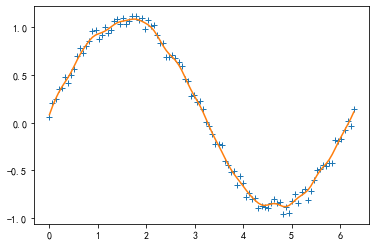

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2

kr = KernelReg(y,x,'c')
plt.plot(x, y, '+')
y_pred, y_std = kr.fit(x)

plt.plot(x, y_pred)
plt.show()


28


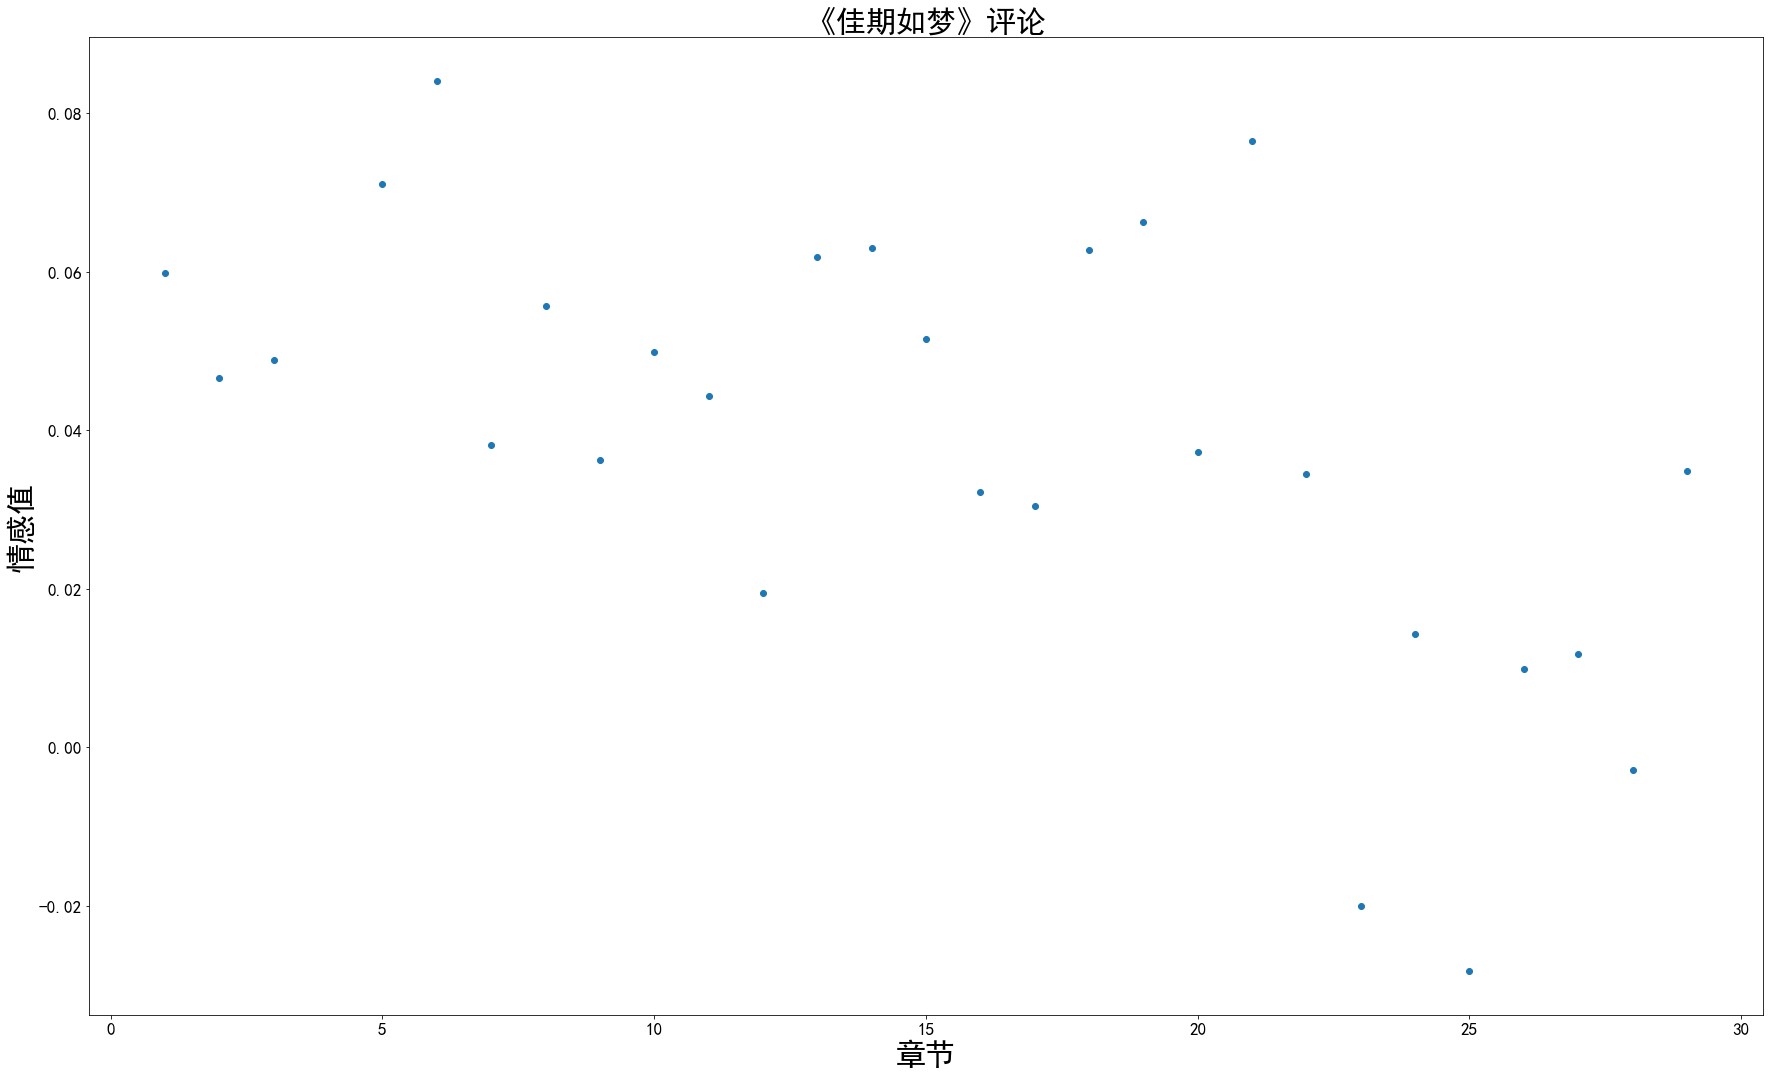

In [35]:
def get_sentiment_score_exclude(folder):
    """
    获取全文情感分数
    """
    s = []
    # 把此处的文件位置改成要分析的文件位置
    # for filename in os.listdir(folder):
    for chapterid in range(1,82):
        try:
            filename='第%d章.txt'%chapterid
            # print(folder+filename,end=' ')
            with open(folder+filename, 'r', encoding='utf-8') as f:
                text = f.read()
                text = cut_sent(text)
                text = list(filter(None, text))
            for w in text:
                s.append(predict(w))
        except:
            continue
    return s, len(s)

def get_sentiment_score_comment(folder):
    """
    获取全文情感分数
    """
    s = []
    scalex=[]
    # 把此处的文件位置改成要分析的文件位置
    # for filename in os.listdir(folder):
    for chapterid in range(1,82):
       
        try:
            filename='comment第%d章.txt'%chapterid
            # print(folder+filename,end=' ')
            with open(folder+filename, 'r', encoding='utf-8') as f:
                text = f.read()
                text = cut_sent(text)
                text = list(filter(None, text))
                if len(text)==0:
                    continue
                temporary=[]
                for w in text:
                    temporary.append(predict(w))
                scalex.append(chapterid)
                s.append(np.average(temporary))
        except:
            continue
    return scalex,s, len(s)

def getarc(folder='',outdir='../晋江/output'):
   
    from scipy.signal import savgol_filter
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    np.savez('佳期如梦',[1,2])
    scalex,scaley,slen=get_sentiment_score_comment(folder)
    np.savez('佳期如梦',scaley)
    # s,slen=get_sentiment_score_exclude(folder)
    print(slen)
    file_name=folder.split('/')[-1]
    # window_length = 1001
    # s=savgol_filter(s,  window_length, 2)
    # s=savgol_filter(s,  window_length, 2)
    plt.figure(figsize=(30,18))
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    plt.title( '《佳期如梦》评论',fontsize=30)
    # plt.xticks(ticks=scalex,labels=scalex,fontsize='xx-large') 
    plt.xticks(fontsize='xx-large') 
    plt.yticks(fontsize='xx-large') 
    plt.xlabel('章节',fontsize=30)
    plt.ylabel('情感值',fontsize=30)
    # scalex=np.linspace(2003,2021,19)
    # print(scalex)

    plt.scatter(scalex,scaley)
    plt.show()
    # plt.savefig("佳期如梦.png")
    plt.close()
getarc(folder='../晋江/佳期如梦/')

[ 0.0598007   0.04654321  0.0488468   0.07108218  0.0840068   0.03813708
  0.0556483   0.03622818  0.04993479  0.04434691  0.01949454  0.06180599
  0.06302779  0.05157462  0.03223628  0.03046874  0.06280104  0.06627427
  0.03727055  0.07644307  0.03447608 -0.01996482  0.01432742 -0.02821782
  0.00991861  0.01179651 -0.00286976  0.03481129]


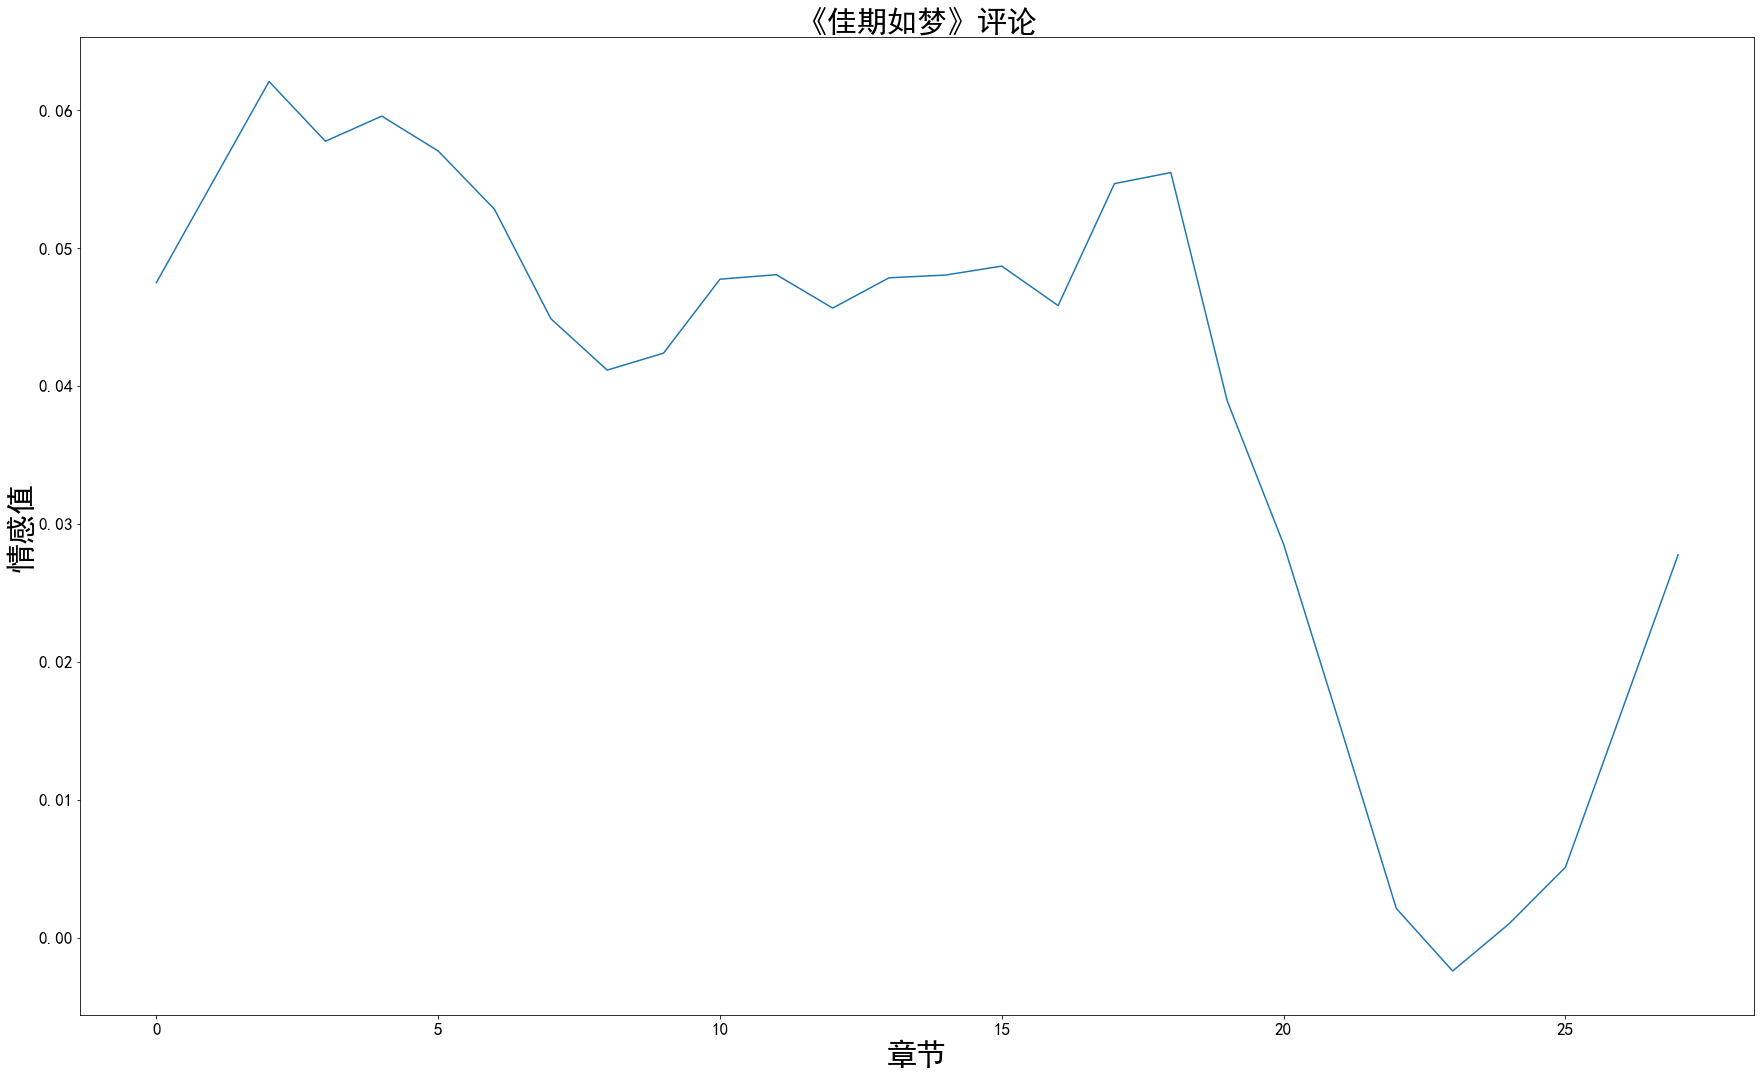

In [41]:
def test():
    from scipy.signal import savgol_filter
    import os
    s=np.load('佳期如梦.npz')['arr_0']
    # np.savez('佳期如梦',scaley)
    # s,slen=get_sentiment_score_exclude(folder)
    print(s)
    
    window_length = 5
    s=savgol_filter(s,  window_length, 1)
    # s=savgol_filter(s,  window_length, 2)
    plt.figure(figsize=(30,18))
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    plt.title( '《佳期如梦》评论',fontsize=30)
    # plt.xticks(ticks=scalex,labels=scalex,fontsize='xx-large') 
    plt.xticks(fontsize='xx-large') 
    plt.yticks(fontsize='xx-large') 
    plt.xlabel('章节',fontsize=30)
    plt.ylabel('情感值',fontsize=30)
    # scalex=np.linspace(2003,2021,19)
    # print(scalex)
    plt.plot(s)
    # plt.scatter(scalex,scaley)
    plt.show()
    # plt.savefig("佳期如梦.png")
    plt.close()
test()

In [ ]:
    # print(len(s))
    # print(type(s))
    # except:
        # print("file_path error")
    
    
    # writer=open(outdir+'/'+file_name+'.txt','w',encoding='utf-8')
    # writer.write('-'*30+'\n')
    # writer.write(file_name +" 共%d个句子\n"%slen)
    # writer.write("%.2f\n"%(np.mean(s)*100))


   
    # top_list=[]
    # bot_list=[]
    
    # for i in range(1,slen-1):
    #     if s[i]>s[i-1] and s[i]>s[i+1]:
    #         top_list.append(s[i])
            # writer.write("第%d句出现波峰：%.2f\n%s%s%s\n"%(i,s[i]*100,text[i-1],text[i],text[i+1]))
        # if s[i]<s[i-1] and s[i]<s[i+1]:
        #     bot_list.append(s[i])
            # writer.write("第%d句出现波谷：%.2f\n%s%s%s\n"%(i,s[i]*100,text[i-1],text[i],text[i+1]))
    # writer.write(file_name +" 共%d个起伏，波谷最值%.2f,波峰最值%.2f\n"%(len(top_list),min(bot_list)*100,max(top_list)*100))
    


In [ ]:
from multiprocessing.dummy import Pool as ThreadPool
# for folder in tqdm(os.listdir(root_path)[:5]):
folders=['../']
    # outdir = '/Users/zinccat/Documents/挑战杯/outputs/2006'
    pool = ThreadPool(8)
    files = [os.path.join(root_path, folder, filename) for filename in os.listdir(folder)]
    pool.map(save_npz, files)
    pool.close()
    pool.join()